# **Project Title - Book Recommendation System**


**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

* Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

* Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**Connecting to Google Drive**

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
#importing libraries required for EDA
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px 
import matplotlib.pyplot as plt
import missingno as msno
from statistics import median

# **User Dataset**

In [3]:
#loading user dataset
user_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Users.csv')
#first five records of user data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
#size of the user dataset
user_df.shape

(278858, 3)

**Data Cleaning**

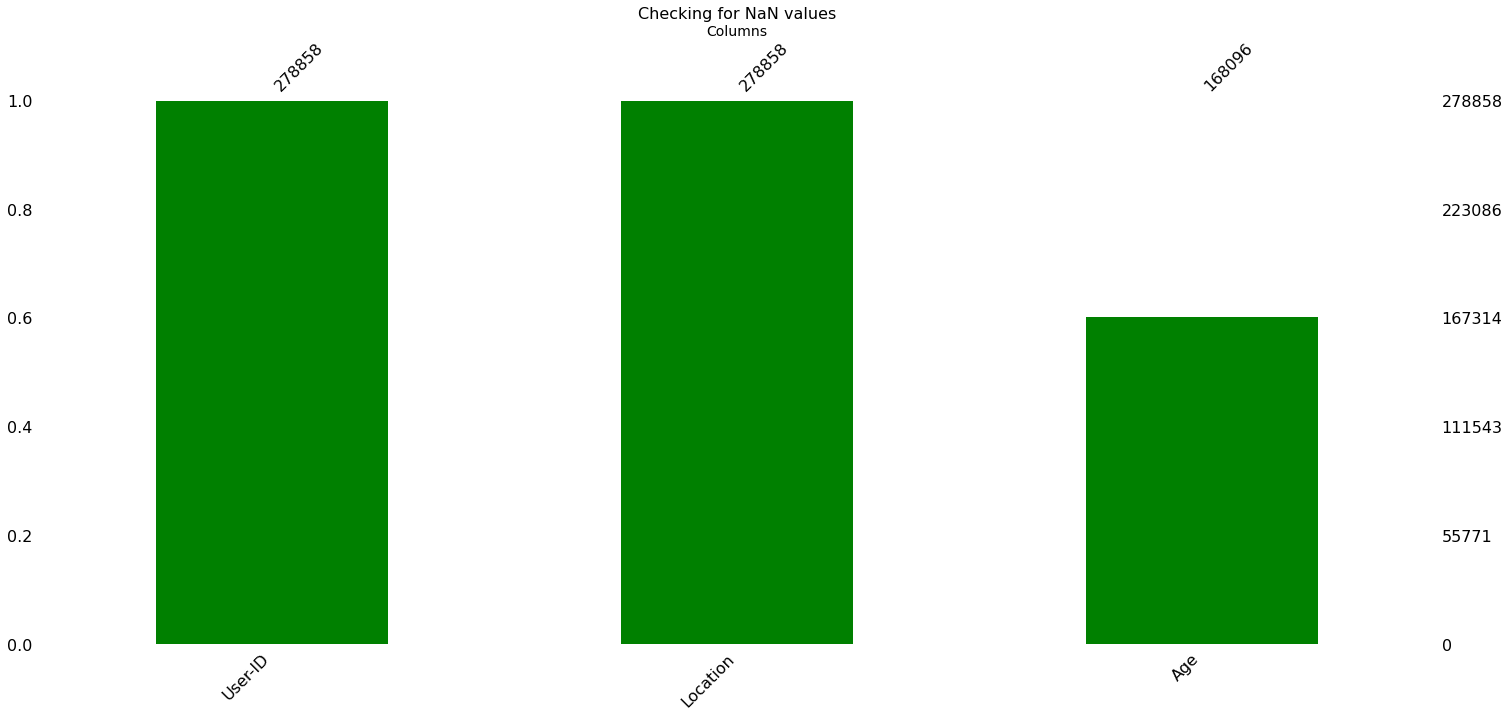

In [5]:
#checking for null values
msno.bar(user_df, color='green')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [6]:
#number of null values present in the datset
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

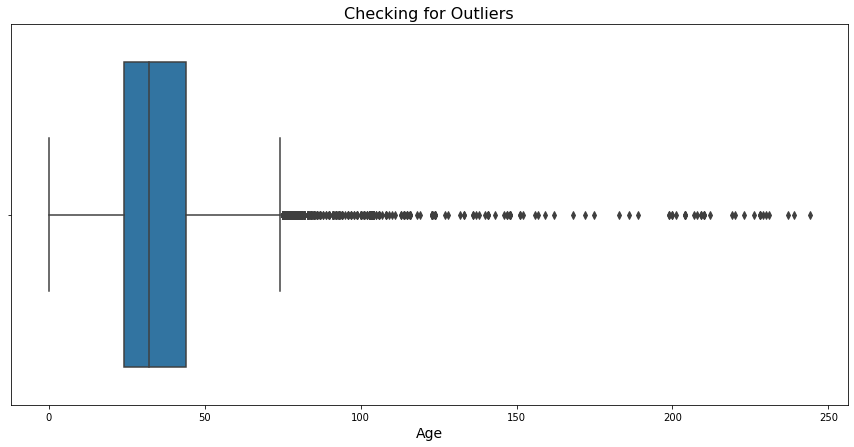

In [7]:
#checking for outliers effect
plt.figure(figsize=(15, 7))
sns.boxplot(user_df['Age'])
plt.title('Checking for Outliers', size=16)
plt.xlabel('Age', size=14)
plt.show()

In [8]:
#number of unique numbers of age
print(len(user_df['Age'].unique().tolist()))
#list of unique values of age
user_df['Age'].unique()

166


array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [9]:
#replacing the outliers with nan value
user_df.loc[(user_df.Age > 100 ) | (user_df.Age < 5),'Age']=np.nan
#first 5 records of the data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


* Assuming that a user lifespan of 100 to remove the outliers effect those are replaced with mean value of the feature.

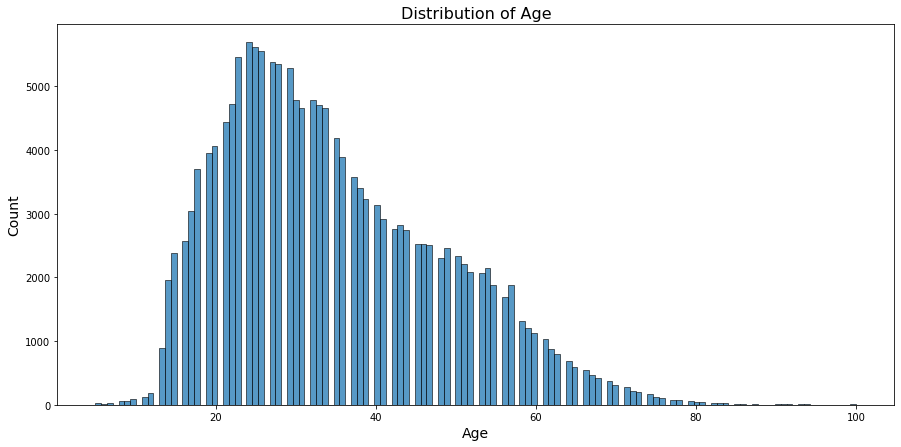

In [10]:
#histplot showing the age data
plt.figure(figsize=(15, 7))
sns.histplot(user_df['Age'])
#after replacing the outliers with nan 
plt.title('Distribution of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [11]:
#filling nan values with mean of the feature
user_df['Age'].fillna(round(user_df['Age'].mean()), inplace=True)
#first 5 records of the data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0


In [12]:
#number of unique numbers of age after cleaning
print(len(user_df['Age'].unique().tolist()))

96


In [13]:
#number of null values present in the datset after cleaning the dataset
user_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

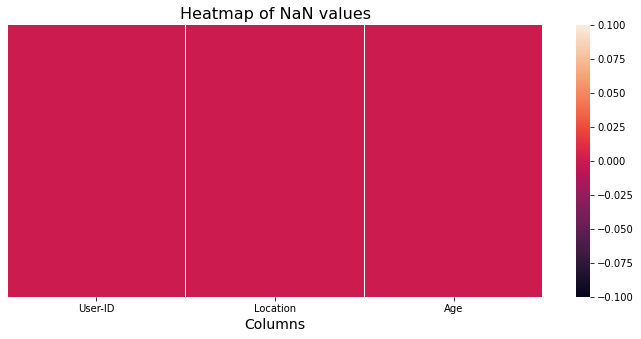

In [14]:
#heatmap of data frame showing null values
plt.figure(figsize=(12, 5))
sns.heatmap(user_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Data Visualizartion**

In [15]:
#number of unique values 
user_df.nunique()

User-ID     278858
Location     57339
Age             96
dtype: int64

**Analysis on Location Feature**

In [16]:
#analysis of location feature
#dictionary of location
location_dict = {}

#extracting the words
for loc in user_df['Location']:
    for name in loc.split(', '):
        if name in location_dict:
            location_dict[name] = location_dict[name]+1
        else:
            location_dict[name] = 1

In [17]:
#dataframe of location and their counts
location_df = pd.DataFrame(location_dict.items(), columns=['Location', 'Count']).sort_values('Count', ascending=False)
#frequent locations
location_df.head()

,Location,Count
2,usa,139737
19,canada,21668
4,california,19896
13,united kingdom,18592
48,germany,17088


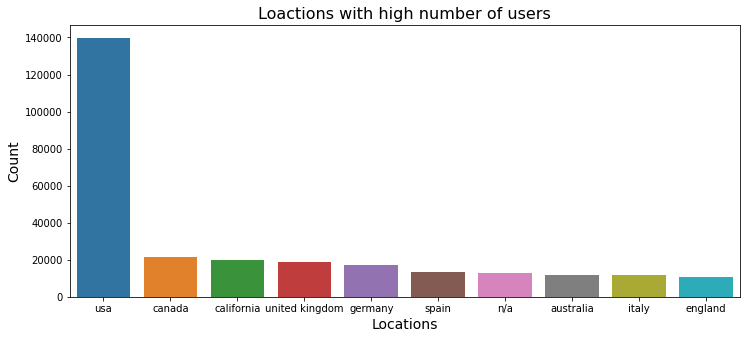

In [18]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=location_df['Location'][:10], y=location_df['Count'][:10])
plt.title('Loactions with high number of users', size=16)
plt.xlabel('Locations', size=14)
plt.ylabel('Count', size=14)
plt.show()

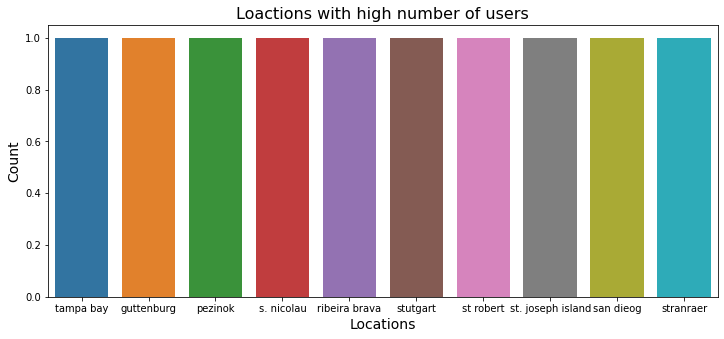

In [19]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=location_df['Location'][-10:], y=location_df['Count'][-10:])
plt.title('Loactions with high number of users', size=16)
plt.xlabel('Locations', size=14)
plt.ylabel('Count', size=14)
plt.show()

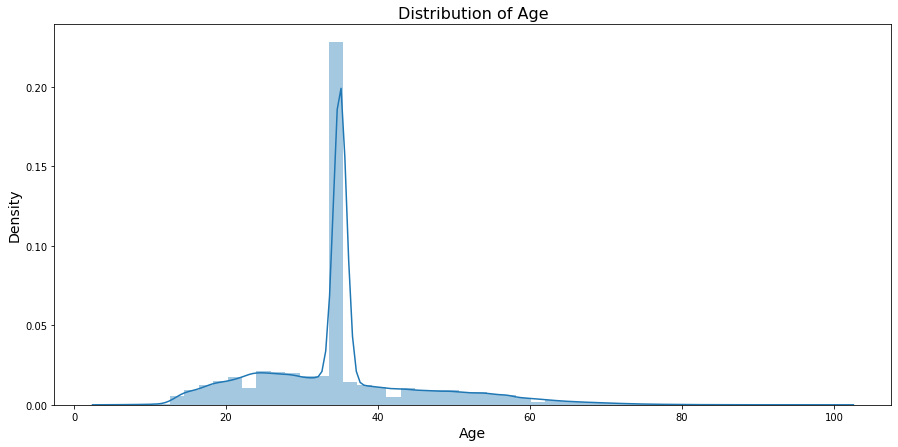

In [20]:
#plotting the time type data
plt.figure(figsize=(15, 7))
sns.distplot(user_df['Age'])
plt.title('Distribution of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Density', size=14)
plt.show()

# **Books Dataset**

In [21]:
#loading book dataset
book_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Books.csv')
#first 5 records of the data
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [22]:
#size of the book dataset
book_df.shape

(271360, 8)

In [23]:
#showing the datatypes of features
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [24]:
#removing the improper type of data
book_df = book_df[~book_df['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
#converting the datatype
book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype('int32')

**Data Cleaning**

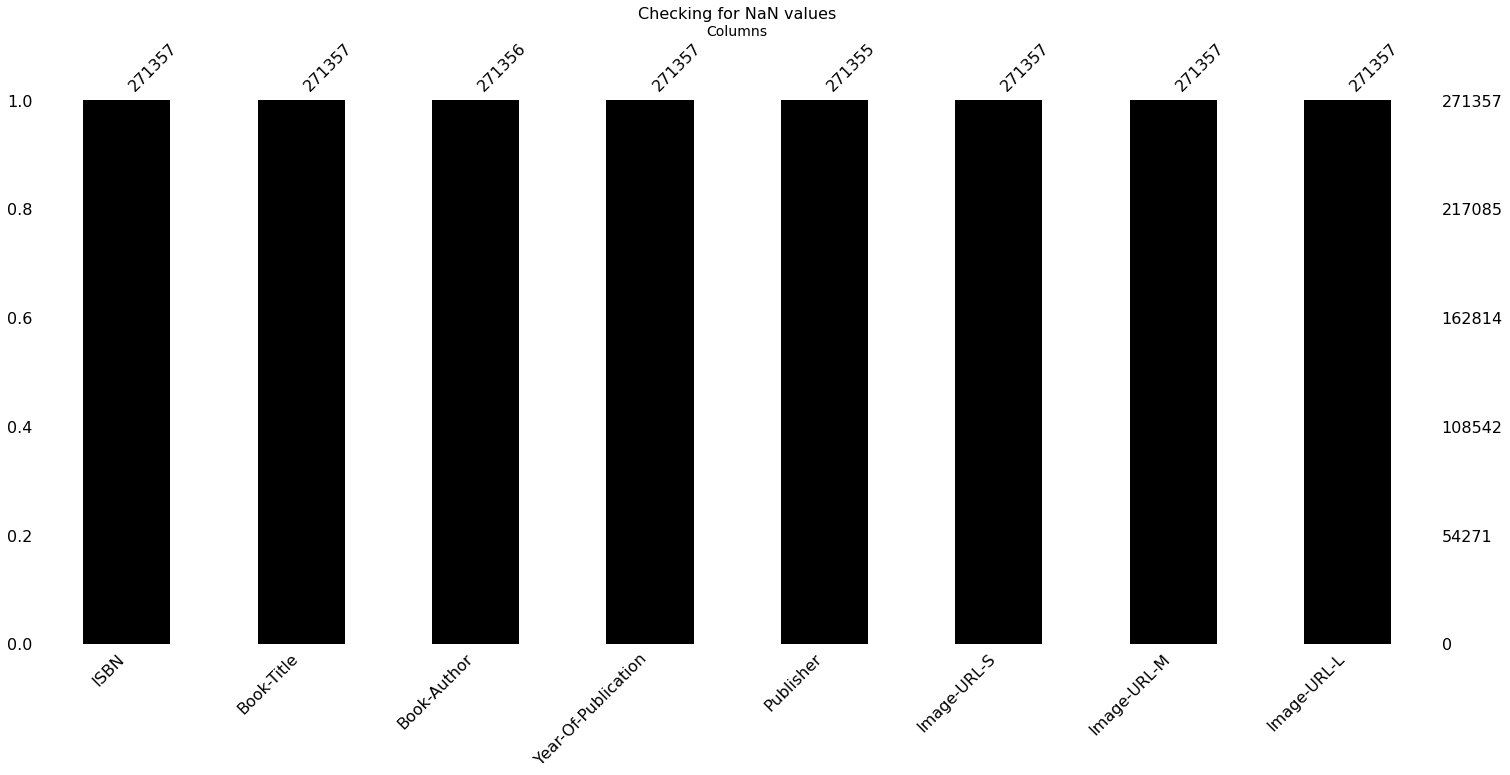

In [25]:
#checking for null values
msno.bar(book_df, color='black')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [26]:
#dropping the nan values
book_df.dropna(inplace=True)

In [27]:
#size of the dataset after cleaning of null values
book_df.shape

(271354, 8)

In [28]:
#number of null values present in the datset after dropping nan values
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

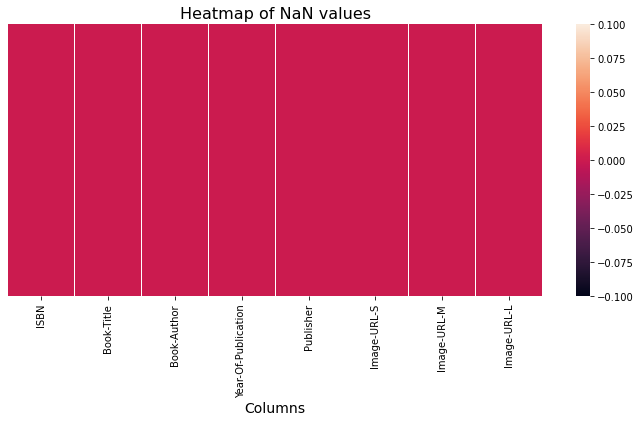

In [29]:
#heatmap of data frame showing null values
plt.figure(figsize=(12, 5))
sns.heatmap(book_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Data Visualizartion**

In [30]:
#number of unique values 
book_df.nunique()

ISBN                   271354
Book-Title             242130
Book-Author            102020
Year-Of-Publication       116
Publisher               16803
Image-URL-S            271038
Image-URL-M            271038
Image-URL-L            271038
dtype: int64

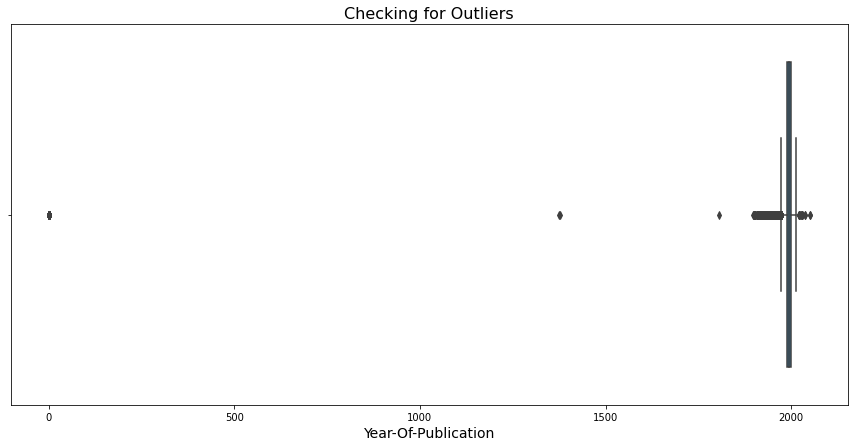

In [31]:
#checking the outliers
plt.figure(figsize=(15, 7))
sns.boxplot(book_df['Year-Of-Publication'])
plt.title('Checking for Outliers', size=16)
plt.xlabel('Year-Of-Publication', size=14)
plt.show()

In [32]:
#number of unique numbers of year of publication
print(len(book_df['Year-Of-Publication'].unique().tolist()))
#list of unique values
book_df['Year-Of-Publication'].unique()

116


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int32)

In [33]:
#considering only the data upto 2021 and replacing the outliers with nan
book_df.loc[(book_df['Year-Of-Publication'] > 2021) | (book_df['Year-Of-Publication'] < 1800),'Year-Of-Publication']=np.NAN
#first 5 records of the data
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [34]:
#year and its value counts
year = book_df['Year-Of-Publication'].value_counts().sort_index()
year.head()

1806.0    1
1897.0    1
1900.0    3
1901.0    7
1902.0    2
Name: Year-Of-Publication, dtype: int64

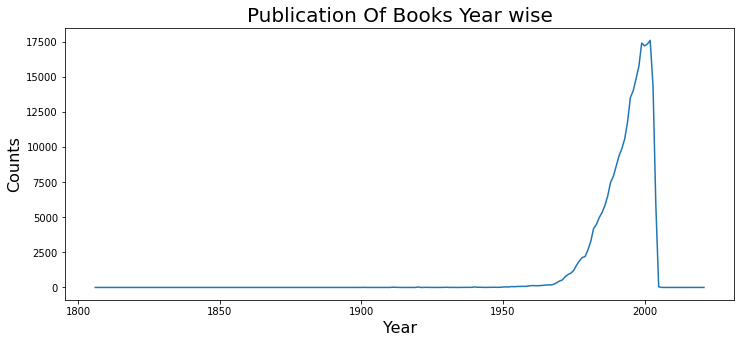

In [35]:
#plotting the Year wise publications
plt.figure(figsize=(12,5))
plt.plot(year)
plt.title("Publication Of Books Year wise", size=20)
plt.ylabel("Counts", size=16)
plt.xlabel("Year", size=16)
plt.show()

In [36]:
#replacing the nan values with the median of the data
book_df['Year-Of-Publication'].fillna(median(book_df['Year-Of-Publication']), inplace=True)
#random five records of the data
book_df.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
132944,0140095993,Impossible Journey: Two Against the Sahara,Michael Asher,1991.0,Penguin USA,http://images.amazon.com/images/P/0140095993.0...,http://images.amazon.com/images/P/0140095993.0...,http://images.amazon.com/images/P/0140095993.0...
197308,1898435235,English Lakes,Salmon,1995.0,J. Salmon Ltd,http://images.amazon.com/images/P/1898435235.0...,http://images.amazon.com/images/P/1898435235.0...,http://images.amazon.com/images/P/1898435235.0...
180575,0821717219,Alone in the Ashes,William W. Johnstone,1985.0,Zebra Books,http://images.amazon.com/images/P/0821717219.0...,http://images.amazon.com/images/P/0821717219.0...,http://images.amazon.com/images/P/0821717219.0...
55323,3492237126,Jahreszeiten des Verlangens. Erotische Geschic...,Bettina. Hesse,2002.0,Piper,http://images.amazon.com/images/P/3492237126.0...,http://images.amazon.com/images/P/3492237126.0...,http://images.amazon.com/images/P/3492237126.0...
255632,0553084119,You and I Yesterday,Marjorie Holmes,1987.0,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553084119.0...,http://images.amazon.com/images/P/0553084119.0...,http://images.amazon.com/images/P/0553084119.0...


In [37]:
#dropping unwanted columns
del(book_df['Image-URL-S'])
del(book_df['Image-URL-M'])
del(book_df['Image-URL-L'])
#dataframe after dropping the unwanted features
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [38]:
#grouping the year of publication for finding their counts
year = pd.DataFrame(book_df.groupby(['Year-Of-Publication']).agg({'Year-Of-Publication':'count'}))
#random selection of 5 records of the data
year.sample(5)

,Year-Of-Publication
Year-Of-Publication,
2003.0,14358
1977.0,1897
1990.0,8660
1980.0,2676
1921.0,2


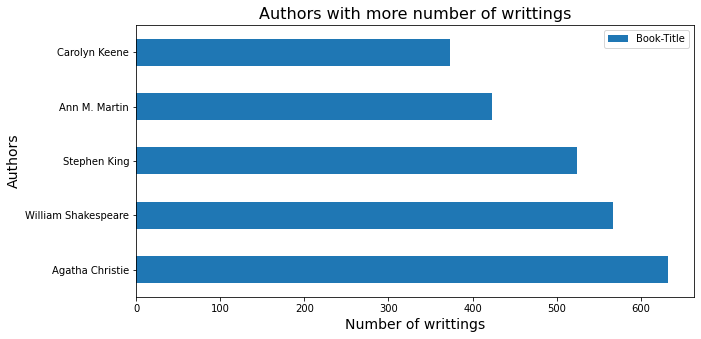

In [39]:
#dataframe of authors of the books with their value counts
author = pd.DataFrame(book_df.groupby(['Book-Author']).agg({'Book-Title':'count'})).sort_values(by='Book-Title',
                                                                                                ascending=False)
top = author.head()
#plotting the data
top.plot(kind='barh', figsize=(10, 5))
plt.title('Authors with more number of writtings', size=16)
plt.ylabel('Authors', size=14)
plt.xlabel('Number of writtings', size=14)
plt.show()

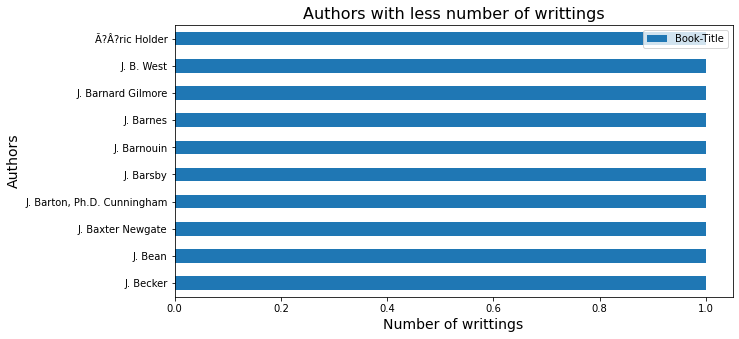

In [40]:
#plotting the least 10 authors of the data
least = author.tail(10)
least.plot(kind='barh', figsize=(10, 5))
plt.title('Authors with less number of writtings', size=16)
plt.ylabel('Authors', size=14)
plt.xlabel('Number of writtings', size=14)
plt.show()

In [41]:
#dataframe of books with their value counts
title = book_df['Book-Title'].value_counts().reset_index()
#changing names of the columns
title.rename(columns={'index':'Book-Title', 'Book-Title':'Count'}, inplace=True)
top = title.head(7)
top

,Book-Title,Count
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Adventures of Huckleberry Finn,20
5,Dracula,20
6,Jane Eyre,19


In [42]:
#plotting the data of top read books
fig = px.pie(top, values='Count', names='Book-Title', title='Top Read Books')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [43]:
#least 10 books
least = title.tail(10)
#plotting the data of top read books
fig = px.pie(least, values='Count', names='Book-Title', title='Less Read Books')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [44]:
#data frame of publisher of books and their counts
publisher = book_df['Publisher'].value_counts().reset_index()
#renaming the columns of the dataframe
publisher.rename(columns={'index':'Publisher', 'Publisher':'Count'}, inplace=True)
top = publisher.head(7)
#plotting the data of top read books
fig = px.pie(top, values='Count', names='Publisher', title='Top Publishers')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [45]:
least = publisher.tail()
#plotting the data of top read books
fig = px.pie(least, values='Count', names='Publisher', title='Publishers with less number of books published')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

# **Ratings Dataset**

In [46]:
#loading ratings dataset
ratings_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Ratings.csv')
#first 5 records of the dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
#size of the ratings dataset
ratings_df.shape

(1149780, 3)

**Data Cleaning**

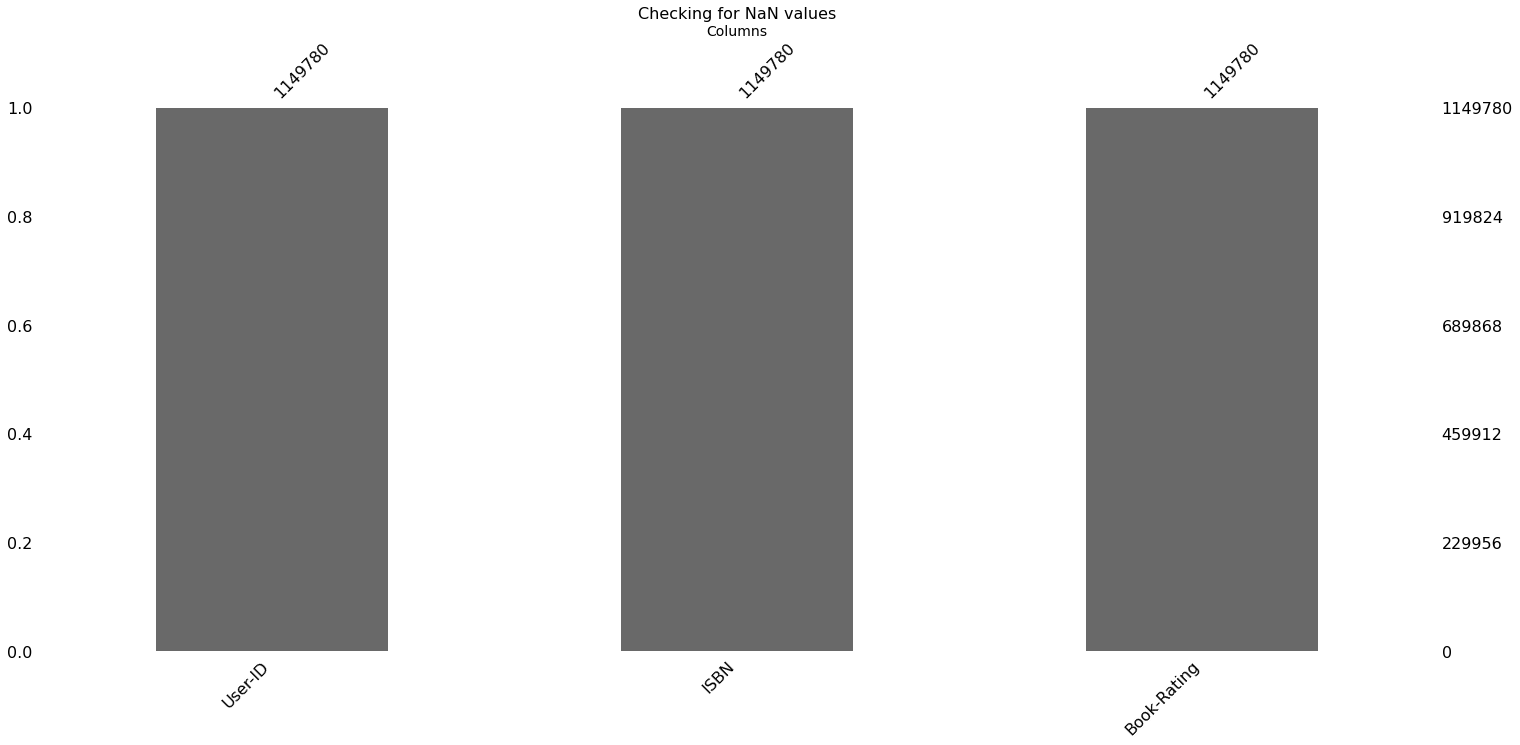

In [48]:
#checking for null values
msno.bar(ratings_df)
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [49]:
#null values aftr cleaning
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**Data Visualization**

In [50]:
#number of unique values 
ratings_df.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [51]:
#dataframe of book ratings and their value counts
ratings = ratings_df['Book-Rating'].value_counts().reset_index()
#renaming the names of columns
ratings.rename(columns={'index':'Book-Rating', 'Book-Rating':'Count'}, inplace=True)
#plotting the data in pie chart
fig = px.pie(ratings, values='Count', names='Book-Rating', title='Book Ratings and their percentage of data')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

# **User Ratings Dataset**

In [52]:
#combining the user and ratings datasets
user_ratings_df = ratings_df.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')
#first  records of merged dataset
user_ratings_df.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",35.0
1,276726,0155061224,5,"seattle, washington, usa",35.0
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [53]:
#checking for nan values
user_ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Location       0
Age            0
dtype: int64

# **Book User Ratings Dataset**

In [54]:
#combining the user and ratings datasets
data = user_ratings_df.merge(book_df, left_on = 'ISBN', right_on = 'ISBN')
#first  records of merged dataset
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",35.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",35.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",35.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books


In [55]:
#dataframe of book and its ratings
ratings = pd.DataFrame(data.groupby('Book-Title').sum()['Book-Rating']).sort_values(by='Book-Rating', ascending=False)
#first 5 records of the dataframe
top = ratings.head()
top

,Book-Rating
Book-Title,
The Lovely Bones: A Novel,5787
The Da Vinci Code,4169
The Secret Life of Bees,3442
The Red Tent (Bestselling Backlist),3134
The Nanny Diaries: A Novel,2923


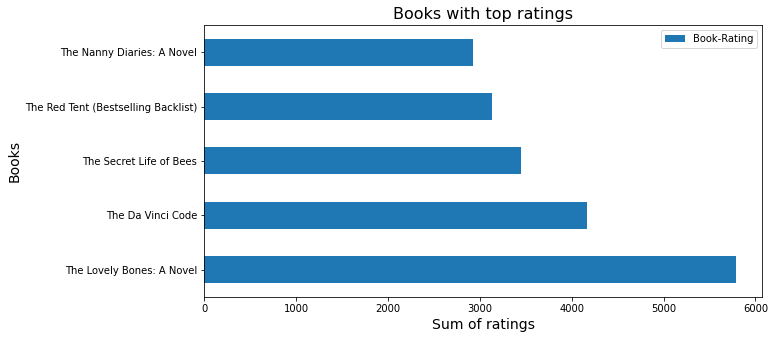

In [56]:
#visualization of books with high ratings
top.plot(kind='barh', figsize=(10, 5))
plt.title('Books with top ratings', size=16)
plt.ylabel('Books', size=14)
plt.xlabel('Sum of ratings', size=14)
plt.show()

In [57]:
#dataframe of book and its ratings
ratings = pd.DataFrame(data.groupby('Book-Title').sum()['Book-Rating']).sort_values(by='Book-Rating', ascending=False)
#first 5 records of the dataframe
least = ratings.tail()
least

,Book-Rating
Book-Title,
Pomp and Circumstance (Gk Hall Large Print Book Series),0
Pomosexuals: Challenging Assumptions About Gender and Sexuality,0
Dangerous To Hold,0
"Pomeranians: Everything About Purchase, Care, Nutrition, Breeding, Behavior, and Training",0
Secret of the Planet Makon (Daystar Voyages),0


In [58]:
#dataframe of book and its ratings
ratings = pd.DataFrame(data.groupby('Book-Title').mean()['Book-Rating'])
#first 5 records of the dataframe
ratings.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
Always Have Popsicles,0.00
Apple Magic (The Collector's series),0.00
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00


In [59]:
#dataframe of book title, its sum of ratings and number of ratings
ratings['Ratings-Count'] = pd.DataFrame(data.groupby('Book-Title').count()['Book-Rating'])
#first 5 records of the dataframe
ratings.head()

,Book-Rating,Ratings-Count
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1


# **Data Preparation**

In [60]:
#selecting the features which are used in model building
data = data[['ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'User-ID', 'Book-Rating']]
#setting the index for the dataframe
data.reset_index(drop=True, inplace=True)
#limiting the dataframe to mentioned index
data = data.iloc[:150000, :]
#first five records of the dataframe
data.head()

,ISBN,Book-Title,Book-Author,Publisher,User-ID,Book-Rating
0,034545104X,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,276725,0
1,034545104X,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2313,5
2,034545104X,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,6543,0
3,034545104X,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,8680,5
4,034545104X,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,10314,9


# **Recommendation Model**

In [61]:
#building the recommendation model
book_matrix = data.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
#print the output
book_matrix

Book-Title,007 El Mundo Nunca Es Suficiente,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,100 Best-Loved Poems (Dover Thrift Editions),1001 Ways to Cut Your Expenses,101 Dalmatians,101 Experiments in the Philosophy of Everyday Life,101 Great Resumes,101 Things You Can Do for Our Children's Future,101 Ways to Bug Your Parents,13 Cent Killers : The 5th Marine Snipers in Vietnam,1421 : The Year China Discovered America,16 Lighthouse Road,1984,1st to Die: A Novel,"2002 World Press Photo (World Press Photo, 2002)",204 Rosewood Lane,21 Dog Years : Doing Time @ Amazon.com,24 Hours,"28 Barbary Lane : A \Tales of the City\"" Omnibus""",2nd Chance,31 Days of Praise : Enjoying God Anew,3rd Degree,4000 Vornamen aus aller Welt. Von Alexander bis Zoe.,50 Simple Things You Can Do to Save the Earth,6th Grade Nickname Game,7 MINUTES,97 Ways to Make A Baby Laugh,A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,"A Baby For Emily (Silhouette Special Edition, No. 1466)",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Body to Die For,A Bone from a Dry Sea (21st Century Reference),A Book Without Covers,A Box of Matches,A Bright Shining Lie: John Paul Vann and America in Vietnam,A CORNER OF THE VEIL : A Novel,A Cat by Any Other Name (Alice Nestleton Mysteries (Paperback)),A Catskill Eagle,...,Wouldn't Take Nothing for My Journey Now,Wounds Of Passion (Presents Plus) (Harlequin Presents No 1687),"Wraith Squadron (Star Wars: X-Wing Series, Book 5)",Writ of Execution,Writer's Digest Handbook of Magazine Article Writing,"Wrong Bride (By The Year 2000: Revenge) (Harlequin Superromance, 830)","Wrong Twin (9 Months) (Harlequin Superromance, No 636)",X Files #04 Squeeze (X Files Middle Grade),X Files #08 Voltage (X Files Middle Grade),X Files Film Novel Spec Mkt,YOU BELONG TO ME,Yakety Yak Yak Yak (Sweet Pickles Series),"Yankee (Harlequin Historical, No 57)",Year In Provence,Year of Wonders: A Novel of the Plague,"Yeeps!: Secrets in the Statue (Abracadabra!, Book 4)",Yesterday's Affair (Harlequin Presents No 1668),"Yesterdays Wedding (Harlequin Romance, No 3152)",You Can Yo-Yo! Twenty-five tricks to Try!,You and No Other (Topaz Historical Romance),"You're Not Elected, Charlie Brown",Young Wives,"Your Child, My Child (Silhouette Special Edition No. 9807)",Your Family Will Love It!: Quick and Healthy Weekday Meals for the Hard-To-Please,Your Finances in Changing Times (The Christian Financial Concepts Series),"Your Life in Your Hands: Understanding, Preventing and Overcoming Breast Cancer",Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Personal Trainer,Your Second Child,Zen Essence : The Science of Freedom (Shambhala Pocket Classics),Zen and the City of Angels,Zen in the Markets,"Zentak, tome 1 : La Passe des Argonautes",Zero,Zuiderkruis: Roman,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",eXistenZ: A Novelization,flambeau@darkcorp.com,the Heiress Bride (sister brides),Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2)
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [62]:
#size of the matrix build
book_matrix.shape

(33588, 5279)

In [63]:
#filling the nan values with 0 in the correlation matrix
book_matrix.fillna(0, inplace=True)
#changing the datatype
book_matrix.astype(np.int32)
#first 5 recods of the data
book_matrix.head()

Book-Title,007 El Mundo Nunca Es Suficiente,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,100 Best-Loved Poems (Dover Thrift Editions),1001 Ways to Cut Your Expenses,101 Dalmatians,101 Experiments in the Philosophy of Everyday Life,101 Great Resumes,101 Things You Can Do for Our Children's Future,101 Ways to Bug Your Parents,13 Cent Killers : The 5th Marine Snipers in Vietnam,1421 : The Year China Discovered America,16 Lighthouse Road,1984,1st to Die: A Novel,"2002 World Press Photo (World Press Photo, 2002)",204 Rosewood Lane,21 Dog Years : Doing Time @ Amazon.com,24 Hours,"28 Barbary Lane : A \Tales of the City\"" Omnibus""",2nd Chance,31 Days of Praise : Enjoying God Anew,3rd Degree,4000 Vornamen aus aller Welt. Von Alexander bis Zoe.,50 Simple Things You Can Do to Save the Earth,6th Grade Nickname Game,7 MINUTES,97 Ways to Make A Baby Laugh,A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,"A Baby For Emily (Silhouette Special Edition, No. 1466)",A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Body to Die For,A Bone from a Dry Sea (21st Century Reference),A Book Without Covers,A Box of Matches,A Bright Shining Lie: John Paul Vann and America in Vietnam,A CORNER OF THE VEIL : A Novel,A Cat by Any Other Name (Alice Nestleton Mysteries (Paperback)),A Catskill Eagle,...,Wouldn't Take Nothing for My Journey Now,Wounds Of Passion (Presents Plus) (Harlequin Presents No 1687),"Wraith Squadron (Star Wars: X-Wing Series, Book 5)",Writ of Execution,Writer's Digest Handbook of Magazine Article Writing,"Wrong Bride (By The Year 2000: Revenge) (Harlequin Superromance, 830)","Wrong Twin (9 Months) (Harlequin Superromance, No 636)",X Files #04 Squeeze (X Files Middle Grade),X Files #08 Voltage (X Files Middle Grade),X Files Film Novel Spec Mkt,YOU BELONG TO ME,Yakety Yak Yak Yak (Sweet Pickles Series),"Yankee (Harlequin Historical, No 57)",Year In Provence,Year of Wonders: A Novel of the Plague,"Yeeps!: Secrets in the Statue (Abracadabra!, Book 4)",Yesterday's Affair (Harlequin Presents No 1668),"Yesterdays Wedding (Harlequin Romance, No 3152)",You Can Yo-Yo! Twenty-five tricks to Try!,You and No Other (Topaz Historical Romance),"You're Not Elected, Charlie Brown",Young Wives,"Your Child, My Child (Silhouette Special Edition No. 9807)",Your Family Will Love It!: Quick and Healthy Weekday Meals for the Hard-To-Please,Your Finances in Changing Times (The Christian Financial Concepts Series),"Your Life in Your Hands: Understanding, Preventing and Overcoming Breast Cancer",Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Personal Trainer,Your Second Child,Zen Essence : The Science of Freedom (Shambhala Pocket Classics),Zen and the City of Angels,Zen in the Markets,"Zentak, tome 1 : La Passe des Argonautes",Zero,Zuiderkruis: Roman,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",eXistenZ: A Novelization,flambeau@darkcorp.com,the Heiress Bride (sister brides),Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2)
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [64]:
#checking the model
wild_animus = book_matrix['Wild Animus']
#print the output
wild_animus.head()

User-ID
9     0.0
14    0.0
16    0.0
23    0.0
26    0.0
Name: Wild Animus, dtype: float64

**Model Implementation**

In [65]:
#function for finding the similar book for the user
def rec_book(book_name):
    #applying the function on dataset
    data = book_matrix[book_name]
    #finding the similar book
    similar_to_book_name = book_matrix.corrwith(data)
    #dataframe of similar book with the correlation result
    corr_book_name = pd.DataFrame(similar_to_book_name, columns=['Correlation'])
    #dropping null values and cleaning the dataframe
    corr_book_name.dropna(inplace=True)
    #adding the count of ratings given by users
    corr_book_name = corr_book_name.join(ratings['Ratings-Count'])
    #dataframe of similar book with their counts of ratings with morethan 50 and correlation result
    result = corr_book_name[corr_book_name['Ratings-Count'] > 50].sort_values('Correlation', ascending=False)
    
    return result 

In [66]:
#similar books recommended by the model
rec_book('Life of Pi').head(10)

,Correlation,Ratings-Count
Book-Title,,
Life of Pi,1.000000,664
Everything Is Illuminated : A Novel,0.089082,61
Balzac and the Little Chinese Seamstress : A Novel,0.080780,284
Welcome to Temptation,0.073213,127
The Handmaid's Tale : A Novel,0.072275,136
The Talented Mr. Ripley (Vintage Crime/Black Lizard),0.071680,75
Girl with a Pearl Earring,0.071068,526
Coastliners : A Novel,0.070105,62
The God of Small Things,0.070083,289


In [67]:
#similar books recommended by the model
rec_book('Wild Animus').head(10)

,Correlation,Ratings-Count
Book-Title,,
Wild Animus,1.000000,2502
Legacy,0.049555,72
Honor Among Thieves,0.039019,68
Legend,0.034592,65
Little Drummer Girl,0.033574,52
"Welcome to Dead House (Goosebumps, No 1)",0.032393,57
False Memory,0.028379,227
Mindbend,0.027579,64
Little House in the Big Woods,0.026662,64


In [68]:
pip install surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619432 sha256=96a8bd4cc9ffa21966496491f63ff6c4982db0930b6f61be63c0325f4cbc21d7
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [69]:
#libraries required for model eveluation
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

In [70]:
#reading the dataset with the rating given by the user
reader = Reader(rating_scale=(0, 10))
surprise_data = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)
#dividing the dataset into train and test sets
trainset, testset = train_test_split(surprise_data, test_size=0.25)

In [71]:
scale = []
# Iterate over model
for model in [SVD()]:
    # Perform cross validation
    result = cross_validate(model, surprise_data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append model name
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    tmp = tmp.append(pd.Series([str(model).split(' ')[0].split('.')[-1]], index=['Model']))
    scale.append(tmp)
    
pd.DataFrame(scale).set_index('Model').sort_values('test_rmse') 

,test_rmse,fit_time,test_time
Model,,,
SVD,3.717001,11.191734,0.966343
